# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:
* Student Name:
* Student Net ID:
* This URL: <a URL to the notebook source of this document>
* GitHub Repo URL: 

# The Monte Carlo Module

In [1]:
# A code block with your classes.

# Test Module

In [2]:
# A code block with your test code.

# Test Results

In [3]:
# A text block with the output of a successful test.

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [4]:
import montecarlosimulator
import matplotlib.pyplot as plt

Welcome to the Monte Carlo Simulator


In [5]:
fair_coin = montecarlosimulator.Die(["H", "T"])

sc1_game1 = montecarlosimulator.Game([fair_coin, fair_coin, fair_coin, fair_coin, fair_coin])
sc1_game1.play(1000)

sc1_analyzer1 = montecarlosimulator.Analyzer(sc1_game1)

sc1_freq_1 = sc1_analyzer1.jackpot() / 1000

sc1_freq_1

0.071

In [6]:
unfair_coin = montecarlosimulator.Die(["H", "T"])
unfair_coin.change_weight("H", 5.0)

sc1_game2 = montecarlosimulator.Game([unfair_coin, unfair_coin, fair_coin, fair_coin, fair_coin])
sc1_game2.play(1000)

sc1_analyzer2 = montecarlosimulator.Analyzer(sc1_game2)

sc1_freq_2 = sc1_analyzer2.jackpot() / 1000

sc1_freq_2

0.086

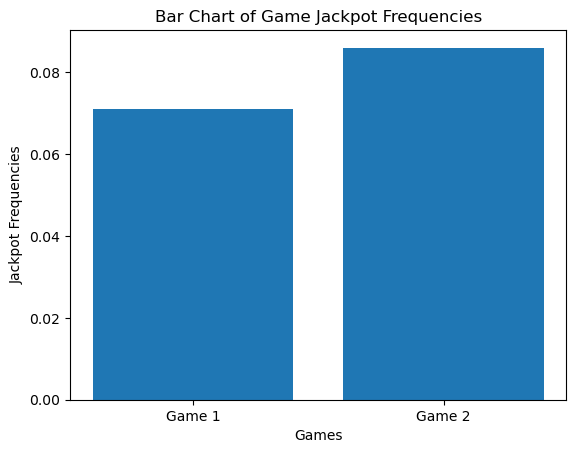

In [7]:
plt.bar(['Game 1', 'Game 2'], [sc1_freq_1, sc1_freq_2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 2

In [8]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [9]:
fair_die = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

sc2_game1 = montecarlosimulator.Game([fair_die, fair_die, fair_die, fair_die, fair_die])
sc2_game1.play(10000)

sc2_analyzer1 = montecarlosimulator.Analyzer(sc2_game1)

sc2_freq1 = sc2_analyzer1.jackpot() / 10000

sc2_freq1

0.0004

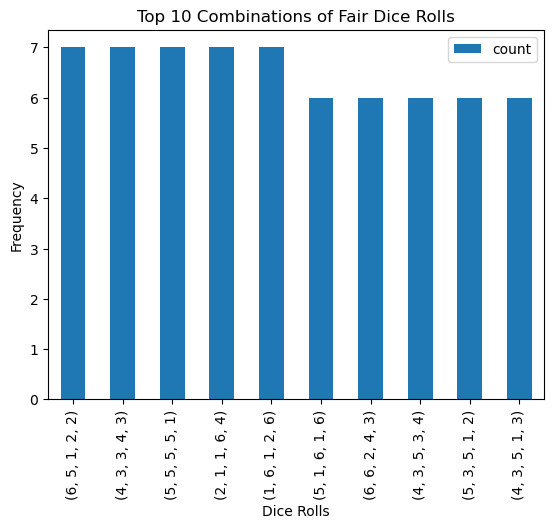

In [10]:
sc2_game1_top_combos = sc2_analyzer1.combo()
sc2_game1_top_10 = sc2_game1_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game1_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Fair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

In [11]:
unfair_die_type1 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])
unfair_die_type2 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

unfair_die_type1.change_weight(6, 5)
unfair_die_type2.change_weight(1, 5)

sc2_game2 = montecarlosimulator.Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
sc2_game2.play(10000)

sc2_analyzer2 = montecarlosimulator.Analyzer(sc2_game2)

sc2_freq2 = sc2_analyzer2.jackpot() / 10000

sc2_freq2

0.0011

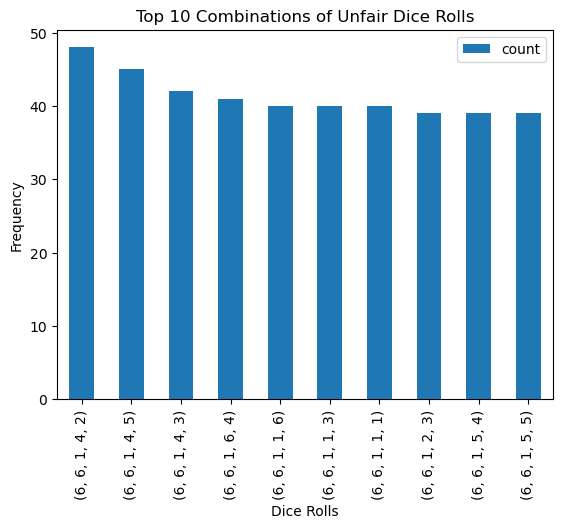

In [12]:
sc2_game2_top_combos = sc2_analyzer2.combo()
sc2_game2_top_10 = sc2_game2_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game2_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Unfair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

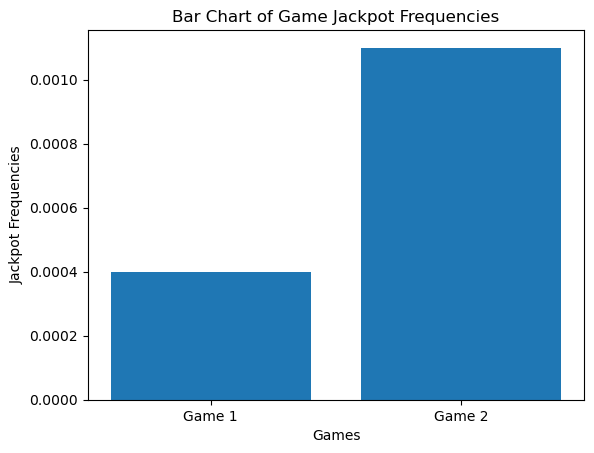

In [13]:
plt.bar(['Game 1', 'Game 2'], [sc2_freq1, sc2_freq2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 3

In [14]:
import pandas as pd
import montecarlosimulator

In [15]:
# create the letter column and frequency column as lists
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
frequencies = [8.4966, 2.072, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034,
               7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671,
               0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902,
               1.7779, 0.2722]

# create the DataFrame
letter_freq_df = pd.DataFrame({'letter': letters, 'frequency': frequencies})

In [16]:
letter_array = letter_freq_df['letter'].values
letter_die = montecarlosimulator.Die(letter_array)

for face in letter_array:
    frequency = letter_freq_df.loc[letter_freq_df['letter'] == face, 'frequency'].values[0]
    letter_die.change_weight(face, frequency)
    
sc3_game = montecarlosimulator.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
sc3_game.play(1000)

sc3_analyzer = montecarlosimulator.Analyzer(sc3_game)

sc3_combos = sc3_analyzer.combo()

In [23]:
pd.set_option('display.max_rows', None)
sc3_combos

count
1 2 3 4 5       
A A E A S      1
    L M O      1
    N M N      1
      N E      1
    O I C      1
    R U I      1
    U P I      1
  D I T G      1
  E C U N      1
    E R M      1
      W E      1
    G I L      1
    I F D      1
    L O U      1
    P C I      1
    R P I      1
    S R L      1
  G C H T      1
    E L V      1
    R A G      1
  H E L T      1
      N E      1
    G H C      1
    I C P      1
    N A I      1
      V I      1
    P P D      1
    S V P      1
  I A N E      1
    C E O      1
    I C B      1
      U M      1
  L A G I      1
    I M O      1
  M N P L      1
    O E R      1
  N C S N      1
    E Y T      1
    L E L      1
    P T A      1
    S O R      1
  O C S I      1
    E N O      1
    S R R      1
  P E R C      1
    L A E      1
    U A P      1
        S      1
    Y E P      1
      L D      1
  R A E S      1
    B D G      1
    C U R      1
    E A C      1
      I N      1
        S      1
      R R      1
    N E A      1
    R A K      1
      D G      1
      E P      1
    T S I      1
    Y R A      1
  S H L P      1
    I S I      1
    L C P      1
    S A A      1
    V U N      1
  T A I M      1
      T H      1
    E M O      1
    L A R      1
    R H L      1
    U K L      1
  U D C O      1
      D R      1
    E N R      1
    H R N      1
    R P W      1
    S A D      1
    U A O      1
  V R O H      1
  X R D U      1
  Y D B U      1
B A J D I      1
    T N A      1
  C I D E      1
    T I N      1
  D E H R      1
  E I E O      1
    L H O      1
    T T C      1
  H D T I      1
    Y R P      1
  L F L L      1
  O S I L      1
  P L T D      1
    O A T      1
  R R I S      1
  T N P O      1
  U A C C      1
  W L N C      1
  X U L G      1
  Y E O U      1
C A A R O      1
    C U L      1
    E E E      1
    I Y E      1
    O A E      1
    R O L      1
  B A A E      1
    O A D      1
  C B Y D      1
    N D N      1
      H U      1
      O F      1
  D C V A      1
    E A U      1
    I B I      1
      O M      1
    O C Y      1
    R G X      1
  E F T E      1
    G O I      1
    K H C      1
    L A A      1
    N T E      1
    R L O      1
    S A L      1
      S L      1
  F L S O      1
    O I O      1
  H C E R      1
  I A R S      1
    C P C      1
  J A A O      1
  L E U G      1
    F M I      1
    L F H      1
  M C F R      1
    D Y I      1
    G O O      1
  N S U B      1
  O E B G      1
    I O E      1
    P U E      1
    T C O      1
  P N E S      1
  R O F A      1
  S E M C      1
    J E T      1
    O O U      1
  T E I S      1
  U C M H      1
    F D G      1
    H U G      1
  Y A A K      1
D A G M W      1
    I O I      1
    R A G      1
      L A      1
    T A C      1
  C E E I      1
  E A K O      1
    L E R      1
    R T S      1
    W T A      1
  G P C A      1
  I E N E      1
    I R U      1
    P R I      1
  L I R I      1
    O T O      1
  N T W C      1
  O E C O      1
      R U      1
      Y L      1
  P U C S      1
  R A T G      1
    F T L      1
  S I E I      1
  U M N T      1
    O A E      1
  W U R N      1
E A E B S      1
      O E      1
    H D C      1
    I T R      1
    K T L      1
    N C A      1
    O C T      1
      N D      1
    P B G      1
    S E G      1
    U A E      1
    W N L      1
  B A W A      1
    E L H      1
  C D C B      1
    O A D      1
        H      1
  D C O S      1
    N E U      1
    P F R      1
    T L T      1
  E A A B      1
      E D      1
    D E T      1
    E E E      1
      O G      1
      P I      1
      Y M      1
    L Y I      1
    R A R      1
    U R R      1
  F B K U      1
  G C O C      1
    I T I      1
  H E D H      1
    T A U      1
      E M      1
    V E G      1
  I A S T      1
    E D I      1
      N L      1
    L S S      1
    M D S      1
      R I      1
    Y L K      1
  K C H O      1
    E L I      1
  L A V T      1
      Y F      1
    E E I      1

In [18]:
# I counted x amount of english words present in the rolls

#english_words = 

#eng_word_freq = english_words / 1000

#eng_word_freq

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [19]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 1616-9B9B

 Directory of D:\DS5100_Final_Project\DS5100_Final_Project

04/30/2023  04:56 PM    <DIR>          .
04/30/2023  04:56 PM    <DIR>          ..
04/27/2023  08:20 PM             3,238 .gitignore
04/30/2023  02:23 PM    <DIR>          .ipynb_checkpoints
04/27/2023  08:20 PM             1,091 LICENSE
04/30/2023  11:10 AM    <DIR>          montecarlosimulator
04/30/2023  12:46 PM           327,723 montecarlo_demo-checkpoint.ipynb
04/30/2023  04:56 PM            10,944 montecarlo_demo.ipynb
04/30/2023  12:44 PM           255,360 project_scrapwork-checkpoint.ipynb
04/30/2023  04:51 PM            34,910 project_scrapwork.ipynb
04/27/2023  08:20 PM                22 README.md
04/28/2023  11:30 PM               334 setup.py
               8 File(s)        633,622 bytes
               4 Dir(s)  1,386,128,707,584 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [20]:
# Installation commands